In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data.
file_loc="Visadataset.csv"
visa_df=pd.read_csv("Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [16]:
p_wage=visa_df['prevailing_wage']
p_wage

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x14ab90310>,
 'caps': [<matplotlib.lines.Line2D at 0x14ab929d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ab91150>],
 'medians': [<matplotlib.lines.Line2D at 0x14ab93ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14abbc150>],
 'means': []}

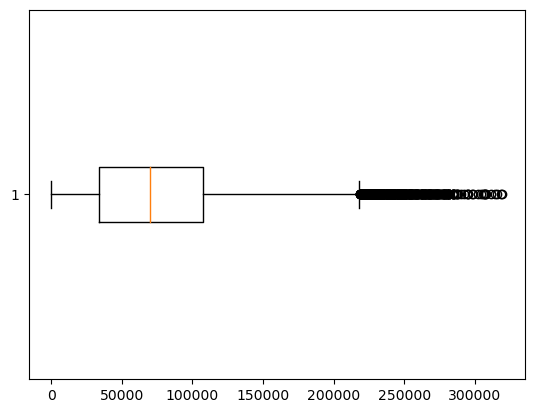

In [7]:

plt.boxplot(p_wage,vert=False)


In [108]:
#Finding Outliers data  for above boxplot
#step1 finging Q1,Median, Q3
q1=round(np.percentile(p_wage,25),2)
q2=round(np.percentile(p_wage,50),2)
q3=round(np.percentile(p_wage,75),2)

#step2   finging IQR
iqr=q3-q1

#step3 finding max and min limits
ub=q3+(1.5*iqr)
lb=q3-(1.5*iqr)
#step4 finding outliers lists
con1=p_wage>ub
con2=p_wage<lb
outliers_df=visa_df[con1|con2]
outliers_df


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [114]:
#Finding Outliers generally for any column/variable
def outliers(col):
    q1=round(np.percentile(visa_df[col],25),2)
    q2=round(np.percentile(visa_df[col],50),2)
    q3=round(np.percentile(visa_df[col],75),2)
    iqr=q3-q1
    ub=q3+(1.5*iqr)
    lb=q3-(1.5*iqr)
    con1=visa_df[col]>ub
    con2=visa_df[col]<lb
    outliers_df=visa_df[con1|con2]
    print(f'no. of outliers of {col} are {len(outliers_df)}')

num_cols=visa_df.select_dtypes(exclude='object').columns   
for i in num_cols:
    outliers(i)
    

no. of outliers of no_of_employees are 1556
no. of outliers of yr_of_estab are 4670
no. of outliers of prevailing_wage are 427


In [105]:
#Finding Non-Outliers data  for above boxplot
#step1 finging Q1,Median, Q3
q1=round(np.percentile(p_wage,25),2)
q2=round(np.percentile(p_wage,50),2)
q3=round(np.percentile(p_wage,75),2)

#step2   finging IQR
iqr=q3-q1

#step3 finding max and min limits
ub=q3+(1.5*iqr)
lb=q3-(1.5*iqr)
#step4 finding non outliers lists

con3=p_wage<=ub
con4=p_wage>=lb
non_outliers_df=visa_df[con3&con4]
non_outliers_df
len(non_outliers_df)

25053

In [101]:
len(outliers_df),len(non_outliers_df)

(427, 25053)

In [60]:
#Finding  Non-Outliers generally for any column/variable
def non_outliers(col):
    q1=round(np.percentile(visa_df[col],25),2)
    q2=round(np.percentile(visa_df[col],50),2)
    q3=round(np.percentile(visa_df[col],75),2)
    iqr=q3-q1
    ub=q3+(1.5*iqr)
    lb=q3-(1.5*iqr)
    con33=visa_df[col]<=ub
    con44=visa_df[col]>=lb
    non_outliers_df=visa_df[con33&con44]
    print(f'no. of non-outliers of {col} are {len(non_outliers_df)}')

num_cols=visa_df.select_dtypes(exclude='object').columns   
for i in num_cols:
    non_outliers(i)

no. of non-outliers of no_of_employees are 23924
no. of non-outliers of yr_of_estab are 20810
no. of non-outliers of prevailing_wage are 25053


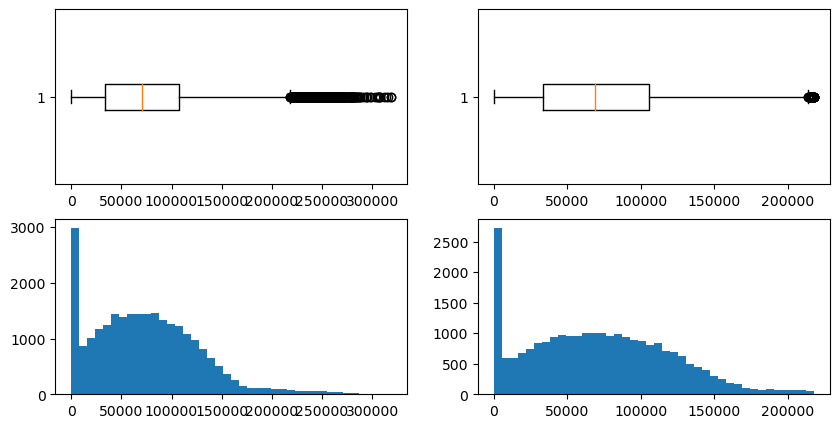

In [68]:
#Comparing Total data vs Non-outliers data using boxplots and histograms
#consider prevailing_wage
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.boxplot(visa_df['prevailing_wage'],vert=False)   #25480 total data
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False)   #25053
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'],bins=40)   #25480 total data
plt.subplot(2,2,4)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)   #25053
plt.show()

**Dealing with Outliers Instead of dropping them** 
- Drop the outliers based some percentage
    -if you have very huge data and the outliers percentage is <2, then drop the outliers
    -Drop the outliers means, we are removing some rows all the columns
    -In the above examples total count=25480, outliers are =427, 427*100/25480 = 1.6
    -After removing 427 observations, we have 25053 observation (98% of data)
-  Impute (Fill) the outliers with Median value
    -We alreday know that outliers doesnt affect Median value
    -So if you dont want loss the data, and you want fill the outliers then use Median
- Impute (Fill) with UB and LB values (Capping)
    -Fill the outliers with UB value, which are having >UB
    -Fill the outliers with LB value, which are having <LB

In [118]:
# Method1  Filling or replacing the outliers data with Median Value of visa_df
#outliers_df1['prevailing_wage']=visa_df['prevailing_wage'].median()
outliers_df['prevailing_wage']=q2
modified_data=outliers_df
modified_data

/var/folders/_8/s82plxn96wd3_592npkh1_k80000gn/T/ipykernel_7703/1657138279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['prevailing_wage']=q2


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,70308.21,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,70308.21,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,70308.21,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,70308.21,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,70308.21,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.21,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.21,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.21,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.21,Year,N,Certified


In [87]:
#merging dataframes using merge()
final_df1=pd.merge(non_outliers_df,modified_data,how="outer")
final_df1

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25476,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25477,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25478,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


In [85]:
#merging dataframes using concat()
#concat() takes one iterable as argument. hence we use list 
final_df2=pd.concat([non_outliers_df,modified_data])
final_df2

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


In [119]:
#Method1.   step1 finging Q1,Median, Q3
q1=round(np.percentile(p_wage,25),2)
q2=round(np.percentile(p_wage,50),2)
q3=round(np.percentile(p_wage,75),2)

#step2   finging IQR
iqr=q3-q1

#step3 finding max and min limits
ub=q3+(1.5*iqr)
lb=q3-(1.5*iqr)
#step4 finding outliers
con1=p_wage>ub
con2=p_wage<lb
outliers_df=visa_df[con1|con2]

#finding non_outliers
con3=p_wage<=ub
con4=p_wage>=lb
non_outliers_df=visa_df[con3&con4]

#Filling or replacing the outliers data with Median Value of visa_df
outliers_df1=outliers_df
#outliers_df1['prevailing_wage']=visa_df['prevailing_wage'].median()
outliers_df1['prevailing_wage']=q2
modified_data=outliers_df1

#merging dataframes
final_df=pd.merge(non_outliers_df,modified_data,how="outer")
final_df

/var/folders/_8/s82plxn96wd3_592npkh1_k80000gn/T/ipykernel_7703/2345308206.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df1['prevailing_wage']=q2


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25476,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25477,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25478,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


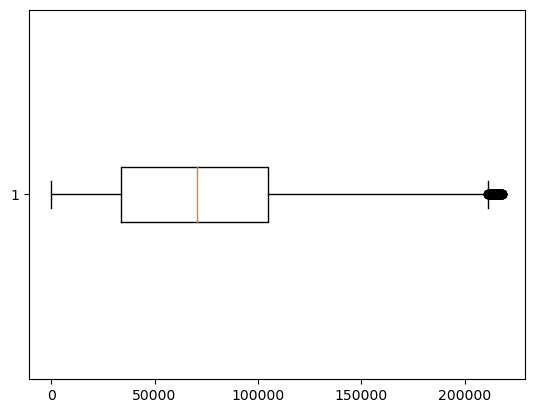

In [91]:
plt.boxplot(final_df["prevailing_wage"],vert=False)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x16ba10d10>,
 'caps': [<matplotlib.lines.Line2D at 0x16b9c05d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bc5a990>],
 'medians': [<matplotlib.lines.Line2D at 0x16b93cd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b9dbf50>],
 'means': []}

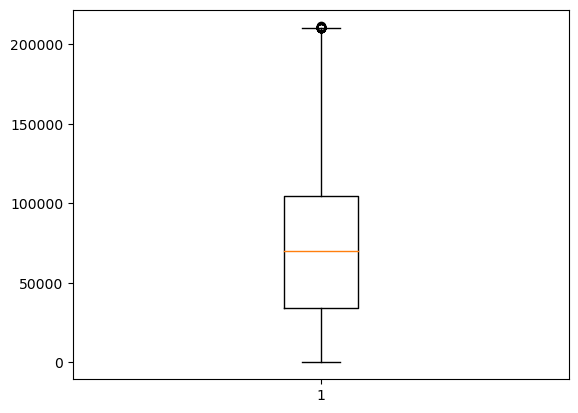

In [125]:
#Method2 If >UB or <LB,replace with median directly, No need of modifications or merging like above code.
#step1 finging Q1,Median, Q3
q1=round(np.percentile(p_wage,25),2)
q2=round(np.percentile(p_wage,50),2)
q3=round(np.percentile(p_wage,75),2)

#step2   finging IQR
iqr=q3-q1

#step3 finding max and min limits
ub=q3+(1.5*iqr)
lb=q3-(1.5*iqr)
#step4 finding outliers and replacing outliers with UB or LB

con1=p_wage>ub
con2=p_wage<lb
con=con1|con2
p_wage=np.where(con,q2,p_wage)

plt.boxplot(p_wage)